In [2]:
#Importing Libraries
import os
import numpy as np
import cv2
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import load_img, ImageDataGenerator
from tensorflow.keras.models import Sequential, load_model, Model
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Dropout, Flatten, Conv2D
from skimage.io import imread,imshow
from tensorflow.keras.optimizers import Adam


In [ ]:
"""

!pip install scikit-image
!pip install statsmodels<1 matplotlib<3.10 scipy<1.14
!pip uninstall ydata-profiling
!pip install ydata-profiling

"""

In [4]:
#Fetch Images count from Fodlers

In [6]:
count = 0 
dirs = os.listdir('Images/')
for dir in dirs:
    files = list(os.listdir('Images/'+dir))
    print( dir +' Folder has '+ str(len(files)) + ' Images')
    count = count + len(files)
print( 'Images Folder has '+ str(count) + ' Images')

daisy Folder has 633 Images
dandelion Folder has 898 Images
roses Folder has 641 Images
sunflowers Folder has 699 Images
tulips Folder has 799 Images
Images Folder has 3670 Images


In [8]:
#Load Images into Arrays as Dataset

In [10]:
base_dir = 'Images/'
img_size = 180
batch = 32

In [12]:
train_ds = tf.keras.utils.image_dataset_from_directory( base_dir,
                                                       seed = 123,
                                                       validation_split=0.2,
                                                       subset = 'training',
                                                       batch_size=batch,
                                                       image_size=(img_size,img_size))

val_ds = tf.keras.utils.image_dataset_from_directory( base_dir,
                                                       seed = 123,
                                                       validation_split=0.2,
                                                       subset = 'validation',
                                                       batch_size=batch,
                                                       image_size=(img_size,img_size))

Found 3670 files belonging to 5 classes.
Using 2936 files for training.
Found 3670 files belonging to 5 classes.
Using 734 files for validation.


In [14]:
flower_names = train_ds.class_names
flower_names

['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']

In [16]:
import matplotlib.pyplot as plt

In [17]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size = AUTOTUNE)

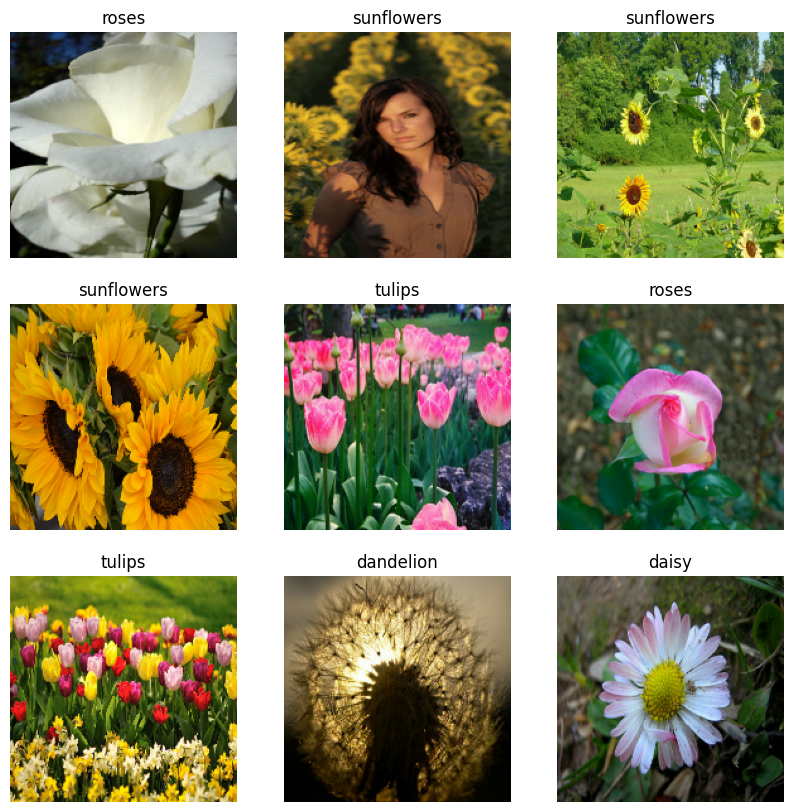

In [20]:
i = 0
plt.figure(figsize=(10,10))

for images, labels in train_ds.take(1):
    for i in range(9):
        plt.subplot(3,3, i+1)
        plt.imshow(images[i].numpy().astype('uint8'))
        plt.title(flower_names[labels[i]])
        plt.axis('off')

In [22]:
val_ds = val_ds.cache().prefetch(buffer_size = AUTOTUNE)

In [24]:
#Data Augmentation

In [26]:
data_augmentation = Sequential([
    layers.RandomFlip("horizontal", input_shape = (img_size,img_size,3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1)
])

C:\Users\nsubh\anaconda3\Lib\site-packages\keras\src\layers\preprocessing\tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


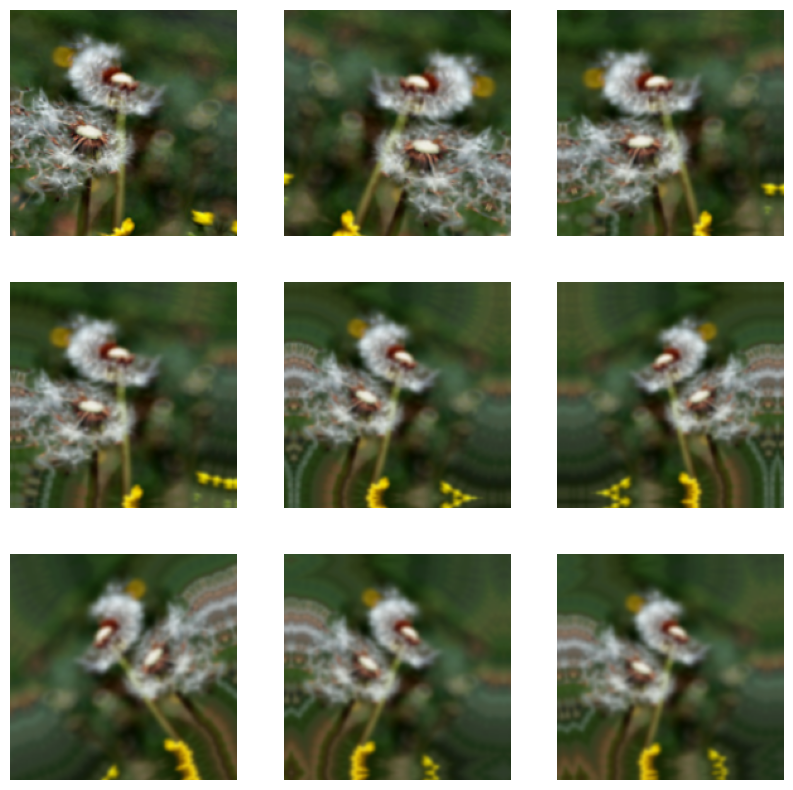

In [28]:
i = 0
plt.figure(figsize=(10,10))

for images, labels in train_ds.take(1):
    for i in range(9):
        images = data_augmentation(images)
        plt.subplot(3,3, i+1)
        plt.imshow(images[0].numpy().astype('uint8'))
        plt.axis('off')

In [30]:
#MOdel Creation

In [33]:
model = Sequential([
    data_augmentation,
    layers.Rescaling(1./255),
    Conv2D(16, 3, padding='same', activation='relu'),
    MaxPool2D(2,2),
    Conv2D(16, 3, padding='same', activation='relu'),
    MaxPool2D(2,2),
    Conv2D(32, 3, padding='same', activation='relu'),
    MaxPool2D(2,2),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPool2D(2,2),
    Conv2D(128, 3, padding='same', activation='relu'),
    MaxPool2D(2,2),
    Dropout(0.2),
    Flatten(),
    Dense(128,activation='sigmoid'),
    Dropout(0.2),
    Dense(5)
])

In [36]:
model.compile(optimizer=Adam(learning_rate=0.001),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [38]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ sequential (Sequential)              │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ rescaling (Rescaling)                │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [40]:
history = model.fit(train_ds, epochs=15, validation_data=val_ds)

Epoch 1/15
92/92 ━━━━━━━━━━━━━━━━━━━━ 8s 62ms/step - accuracy: 0.2724 - loss: 1.5593 - val_accuracy: 0.5436 - val_loss: 1.1302
Epoch 2/15
92/92 ━━━━━━━━━━━━━━━━━━━━ 5s 55ms/step - accuracy: 0.5449 - loss: 1.1130 - val_accuracy: 0.6158 - val_loss: 0.9947
Epoch 3/15
92/92 ━━━━━━━━━━━━━━━━━━━━ 5s 53ms/step - accuracy: 0.5742 - loss: 1.0309 - val_accuracy: 0.6458 - val_loss: 0.8999
Epoch 4/15
92/92 ━━━━━━━━━━━━━━━━━━━━ 5s 55ms/step - accuracy: 0.6398 - loss: 0.9247 - val_accuracy: 0.5790 - val_loss: 1.0204
Epoch 5/15
92/92 ━━━━━━━━━━━━━━━━━━━━ 5s 56ms/step - accuracy: 0.6448 - loss: 0.8909 - val_accuracy: 0.6499 - val_loss: 0.8584
Epoch 6/15
92/92 ━━━━━━━━━━━━━━━━━━━━ 5s 56ms/step - accuracy: 0.7061 - loss: 0.8018 - val_accuracy: 0.6757 - val_loss: 0.8066
Epoch 7/15
92/92 ━━━━━━━━━━━━━━━━━━━━ 5s 56ms/step - accuracy: 0.6887 - loss: 0.7721 - val_accuracy: 0.7057 - val_loss: 0.7507
Epoch 8/15
92/92 ━━━━━━━━━━━━━━━━━━━━ 5s 57ms/step - accuracy: 0.7220 - loss: 0.7262 - val_accuracy: 0.7016 - v

In [44]:
def classify_images(image_path):
    input_image = tf.keras.utils.load_img(image_path, target_size=(180,180))
    input_image_array = tf.keras.utils.img_to_array(input_image)
    input_image_exp_dim = tf.expand_dims(input_image_array,0)

    predictions = model.predict(input_image_exp_dim)
    result = tf.nn.softmax(predictions[0])
    outcome = 'The Image belongs to ' + flower_names[np.argmax(result)] + ' with a score of '+ str(np.max(result)*100)
    return outcome

C:\Users\nsubh\AppData\Local\Temp\ipykernel_18496\441999245.py:1: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  imshow(r'Images/dandelion/10043234166_e6dd915111_n.jpg')
C:\Users\nsubh\anaconda3\Lib\site-packages\skimage\io\_io.py:232: FutureWarning: `call_plugin` is deprecated since version 0.25 and will be removed in version 0.27. The plugin infrastructure of `skimage.io` is deprecated. Instead, use `imageio` or other I/O packages directly.
  arr = call_plugin('imread', arr, plugin=plugin)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step


'The Image belongs to dandelion with a score of 97.39127159118652'

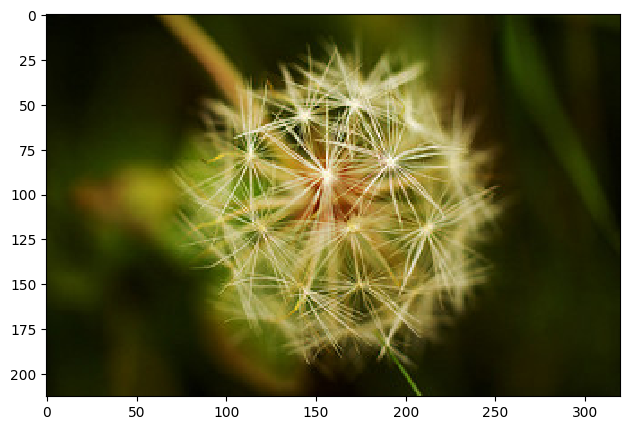

In [46]:
imshow(r'Images/dandelion/10043234166_e6dd915111_n.jpg')
classify_images('Images/dandelion/10043234166_e6dd915111_n.jpg')